In [2]:
#오류메세지 삭제
import warnings
warnings.filterwarnings("ignore")
#인코딩 확인
import chardet
with open ("/Users/Ryu Seung Gwon/Downloads/SeoulBikeData.csv", mode='rb') as f:
    d = f.readline()
print(chardet.detect(d)) 

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
#데이터셋 불러오기
import pandas as pd
df = pd.read_csv("/Users/Ryu Seung Gwon/Downloads/SeoulBikeData.csv",encoding='ISO-8859-1', low_memory=False)

In [1]:
df.head()

NameError: name 'df' is not defined

In [5]:
#어떤 데이터셋으로 이루어져있는지 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
#결측치 확인
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# 각 계절별 바이크 대여량 분석

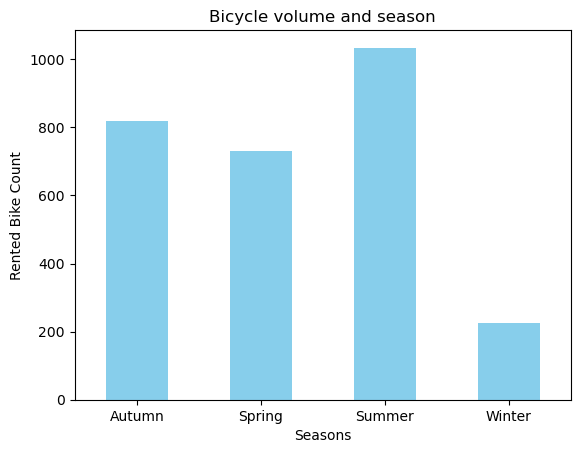

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 계절 (Seasons) 열 을 Categorical 데이터로 변환하고 순서를 지정
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# 계절별 자전거 대여량의 평균 계산
seasonal_data = df.groupby('Seasons')['Rented Bike Count'].mean()

# 시각화: 각 계절별 자전거 대여량을 막대 그래프로 표시
seasonal_data.plot(kind='bar', color='skyblue')
plt.title("Bicycle volume and season")
plt.xlabel("Seasons")
plt.ylabel("Rented Bike Count")
plt.xticks(rotation=0)
plt.show()

### 유의미한 관계가 있다고 판단해서 계절과 관련있는 온도를 독립변수로 두고 단순회귀분석을 진행

In [8]:
import statsmodels.api as sm

# 독립 변수로 온도 (Temperature(°C)) 선택
x = df['Temperature(°C)']

# 종속 변수 선택
y = df['Rented Bike Count']

# 상수항 (절편) 추가
x = sm.add_constant(x)

# 모델 생성
model = sm.OLS(y, x)

# 모델 피팅
results = model.fit()

# 모델 요약
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3578.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:45:33   Log-Likelihood:                -67600.
No. Observations:                8760   AIC:                         1.352e+05
Df Residuals:                    8758   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             329.9525      8.541     

###  (위분석결과)p-value 가 유의수준인 0.05보다 작기 때문에 종속변수에 유의미한 영향을 준다고 볼 수 있다.

## 회귀분석 시각화

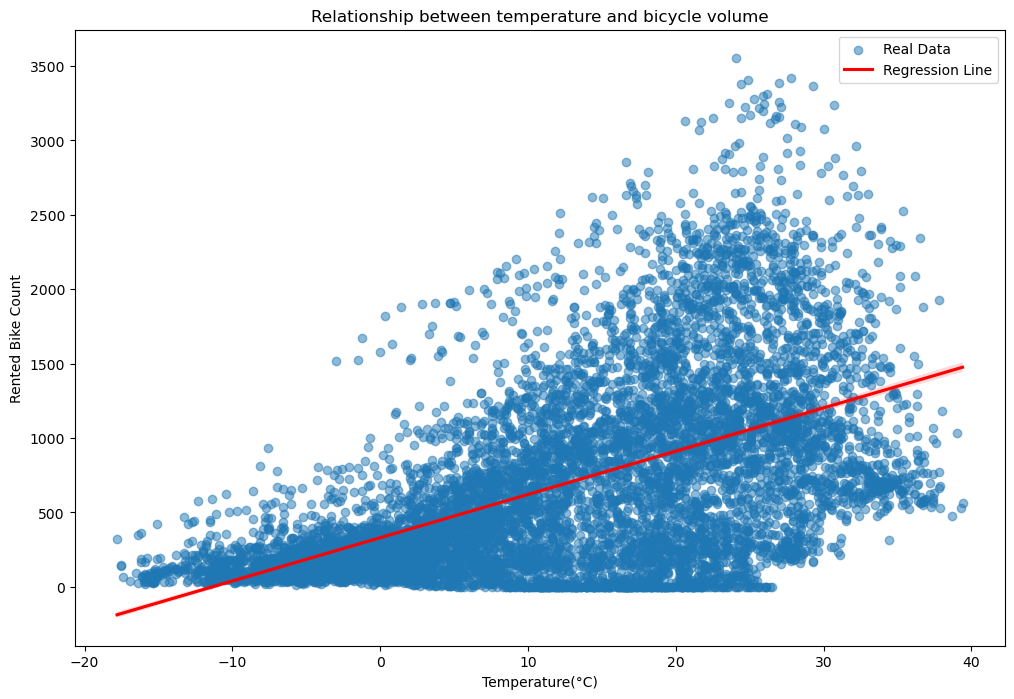

'직선적경향\n온도가 올라갈수록 대여량이 증가한다.'

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그림 크기 설정
plt.figure(figsize=(12, 8))  # 가로 12 인치, 세로 8 인치

# 실제 데이터 포인트
plt.scatter(df['Temperature(°C)'], df['Rented Bike Count'], label='Real Data', alpha=0.5)

# 회귀선 추가
sns.regplot(x='Temperature(°C)', y='Rented Bike Count', data=df, scatter=False, color='red', label='Regression Line')

plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship between temperature and bicycle volume')
plt.legend()
plt.show()

'''직선적경향
온도가 올라갈수록 대여량이 증가한다.'''

## 가시거리와 대여량의 관계시각화

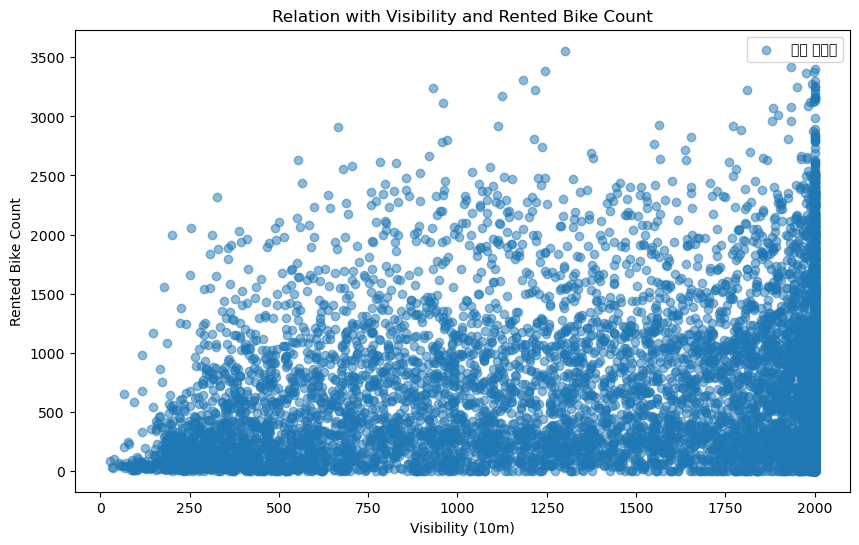

In [10]:
import matplotlib.pyplot as plt

# 실제 데이터 포인트
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.scatter(df['Visibility (10m)'], df['Rented Bike Count'], label='실제 데이터', alpha=0.5)

plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.title('Relation with Visibility and Rented Bike Count')
plt.legend()
plt.show()


## 관계가 있어보여 회귀분석 진행

In [11]:
import statsmodels.api as sm

# 독립 변수로 가시거리 (Visibility) 선택
x = df['Visibility (10m)']

# 종속 변수 선택
y = df['Rented Bike Count']

# 상수항 (절편) 추가
x = sm.add_constant(x)

# 모델 생성
model = sm.OLS(y, x)

# 모델 피팅
results = model.fit()

# 모델 요약
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     362.2
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           3.67e-79
Time:                        14:45:34   Log-Likelihood:                -68923.
No. Observations:                8760   AIC:                         1.378e+05
Df Residuals:                    8758   BIC:                         1.379e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              400.9966     17.324  

## (결과분석)p-value가 유의수준인 0.05보다 낮기 때문에 종속변수에 유의미한 영향을 미친다.

## 가시거리에 영향을 주는 가장 큰 요소는 습도라고 판단을 했고 그래서 가시거리와 습도의 상관관계분석을 했다

In [12]:
correlation = df['Visibility (10m)'].corr(df['Humidity(%)'])
print(f"Pearson Correlation between Visibility and Humidity: {correlation}")

Pearson Correlation between Visibility and Humidity: -0.5430903446558321


### 실제로 음의 상관관계가 있었음

## 그래서 상관관계가 있다고 생각해서 가시거리와 습도를 독립변수로 두고 다중회귀분석을 진행을했다.

In [13]:
import statsmodels.api as sm

# 가시거리와 습도를 독립 변수로 선택
x = df[['Visibility (10m)', 'Humidity(%)']]

# 상호작용 항 추가
x['Visibility*Humidity'] = df['Visibility (10m)'] * df['Humidity(%)']
# 종속 변수 선택
y = df['Rented Bike Count']

# 상수항 (절편) 추가
x = sm.add_constant(x)

# 다중 회귀 모델 생성
model = sm.OLS(y, x)

# 모델 피팅
results = model.fit()

# 모델 요약
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     221.9
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.01e-138
Time:                        14:45:34   Log-Likelihood:                -68779.
No. Observations:                8760   AIC:                         1.376e+05
Df Residuals:                    8756   BIC:                         1.376e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1599.8335    

### 가시거리와 습도의 상호작용을 고려해 대여량에 유의미한 영향을 미치는지 확인했고 상호작용 값이 p-value보다 작기 때문에 유의미하다.

## 시간대별 대여량 분석

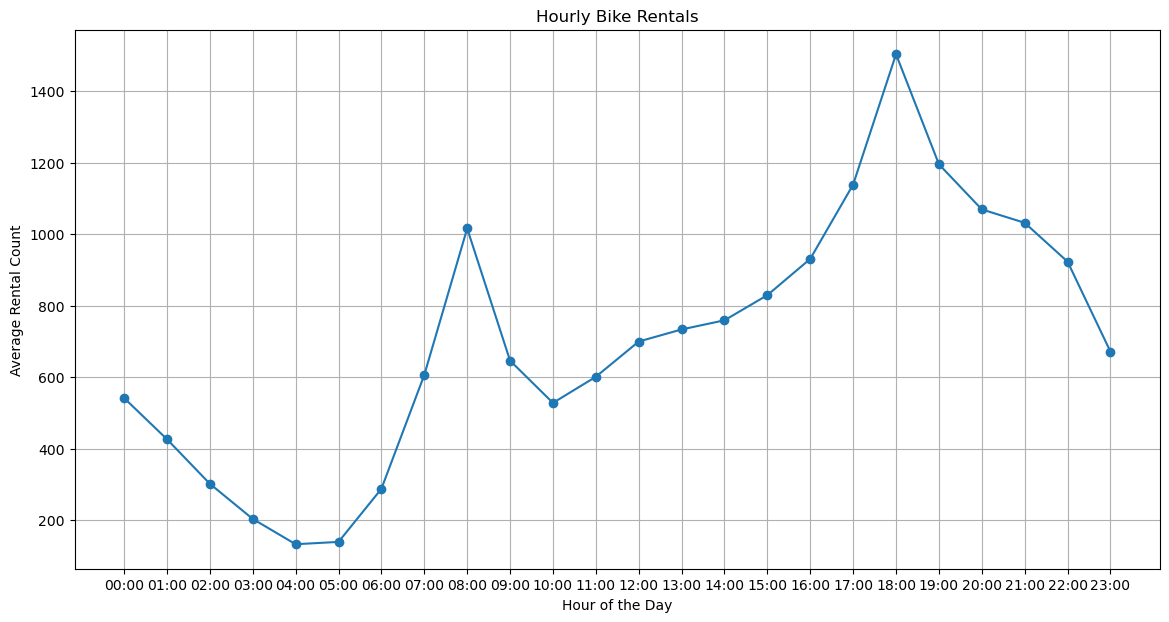

'\n출퇴근 시간때에 자전거 수요량이 많아지는 것을 파악할수있다.'

In [14]:
import matplotlib.pyplot as plt

# 시간대별 대여량의 평균 계산
hourly_rentals = df.groupby('Hour')['Rented Bike Count'].mean()

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(hourly_rentals.index, hourly_rentals.values, marker='o')
plt.title('Hourly Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rental Count')
plt.grid(True)

# X 축 눈금 설정
plt.xticks(hourly_rentals.index)

# X 축 레이블 설정
plt.xticks(hourly_rentals.index, [f"{hour:02}:00" for hour in hourly_rentals.index])

plt.show()
'''
출퇴근 시간때에 자전거 수요량이 많아지는 것을 파악할수있다.'''

### 출퇴근 시간인 시간에 대여량이 증가하는 결과 도출했다.

## 공휴일인 날과 공휴일이 아닌 날의 대여량 차이 시각화

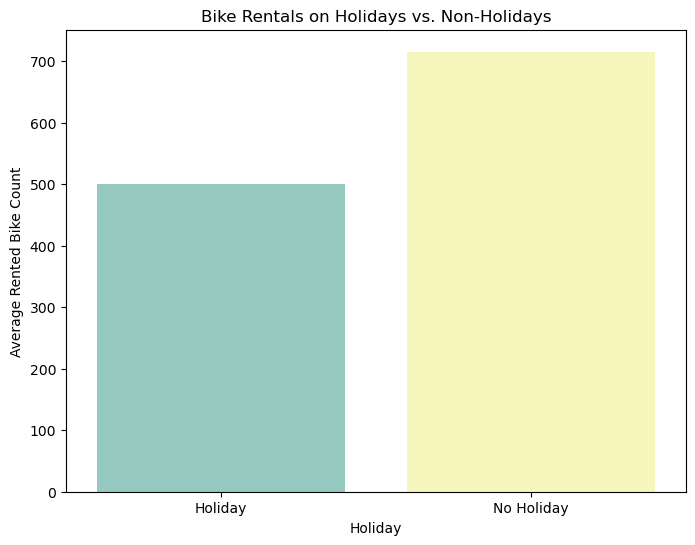

"'\n공휴일이 아닐 때 자전거 대여량이 더 높아지는 이유는 위와 마찬가지로 출퇴근 여부와 연관이 있어보인다.\n"

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Holiday' 열에 따른 대여량 평균 계산
rentals_by_holiday = df.groupby('Holiday')['Rented Bike Count'].mean()

# 시각화: 휴일(Holiday)과 비휴일(No Holiday)에 따른 대여량 평균을 막대 그래프로 표시
plt.figure(figsize=(8, 6))
sns.barplot(x=rentals_by_holiday.index, y=rentals_by_holiday.values, palette='Set3')
plt.title("Bike Rentals on Holidays vs. Non-Holidays")
plt.xlabel("Holiday")
plt.ylabel("Average Rented Bike Count")
plt.show()
''''
공휴일이 아닐 때 자전거 대여량이 더 높아지는 이유는 위와 마찬가지로 출퇴근 여부와 연관이 있어보인다.
'''

### 공휴일이 아닐 때 자전거 대여량이 더 높아지는 이유는 위와 마찬가지로 출퇴근 여부와 연관이 있어보인다.

# 각 요일별 대여량 시각화

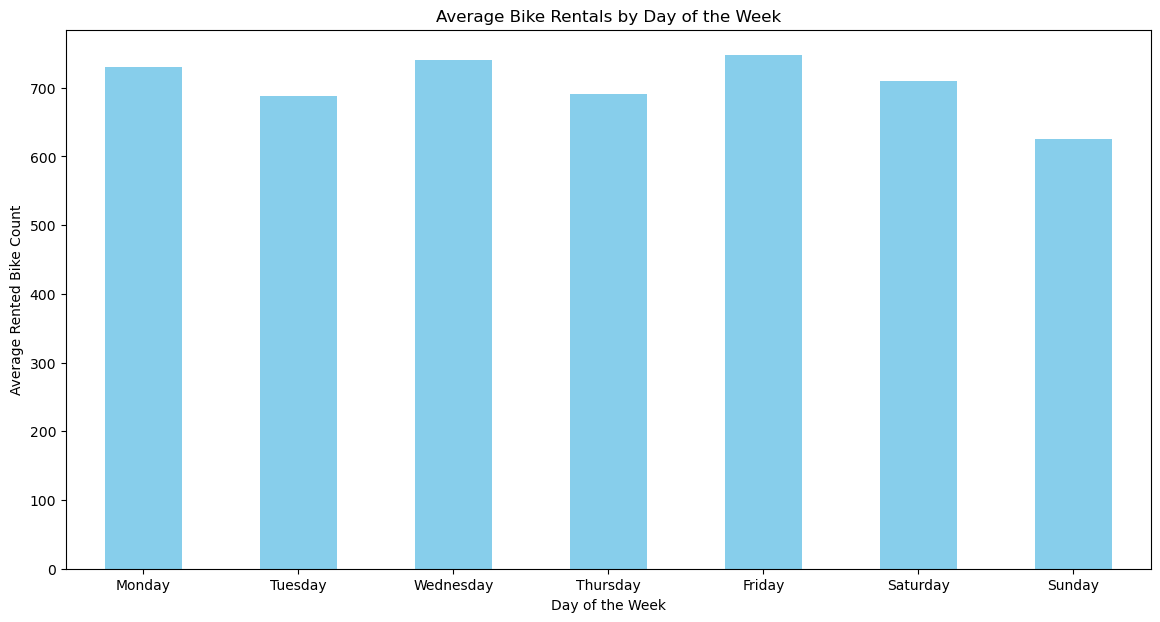

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# 'Date' 열을 날짜형으로 변환 (날짜 형식을 "%d/%m/%Y"로 지정)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# 'Date' 열을 기반으로 각 날짜의 요일을 계산 (0: 월요일, 6: 일요일)
df['Day of Week'] = df['Date'].dt.dayofweek

# 요일을 문자열로 변환
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day Name'] = df['Day of Week'].map(lambda x: day_names[x])

# 데이터를 요일로 그룹화하고 각 요일별 자전거 대여량의 평균 계산
rentals_by_day = df.groupby('Day Name')['Rented Bike Count'].mean().reindex(day_names)

# 시각화: 요일별 자전거 대여량 평균을 막대 그래프로 표시
plt.figure(figsize=(14, 7))
rentals_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rented Bike Count')
plt.xticks(rotation=0)  # x 축 레이블의 회전 각도 조절
plt.show()


### 그렇게 의미는 없어보이지만 공휴일인 일요일에는 다른 요일에 비해 수요가 적다. (위의 결과 값과 연관지어도 될듯해요)